In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# 군집화 필요한 패키지
from scipy.cluster.hierarchy import linkage, dendrogram

# 회귀분석 패키지

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [87]:
train = pd.read_csv('D:/school/5_1/MediaProject/kaggle battle ground/input/pubg-weapon-stats.csv')

In [136]:
data = train.copy()

In [137]:
data.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

# 레이더 차트 사용

### 라이플 보기

In [139]:
# 먼저 데이터 프레임을 라이플로만 구성하여 새로 만들자
rifle = data[data['Weapon Type'] == "Assault Rifle"]

In [140]:
# 띄어쓰기 포함된 컬럼명들 언더바 붙여서 바꾸기
rifle.rename(columns = {"Weapon Name":"WeaponName"
                        ,"Bullet Type":"BulletType"
                       , "Magazine Capacity":"MagazineCapacity"
                       , "Bullet Speed":"BulletSpeed"
                       , "Rate of Fire":"RateOfFire"
                       , "Shots to Kill (Chest)":"ShotsToKillChest"
                       , "Shots to Kill (Head)":"ShotsToKillHead"
                       , "Damage Per Second":"DamagePerSecond"
                       , "Fire Mode":"FireMode"}, inplace = True)
rifle

,WeaponName,Weapon Type,BulletType,Damage,MagazineCapacity,Range,BulletSpeed,RateOfFire,ShotsToKillChest,ShotsToKillHead,DamagePerSecond,FireMode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,0.096,4,2,448.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,0.010,4,2,430.0,"Single, Burst",43.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,0.096,4,2,466.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [141]:
# rifle에서 damage, magazine, range, rate of fire, damage per second보자. 
# 그리고 BDMG와 HDMG의 총합으로 총기의 화력을 생각해보자. 근데 연사력도 중요하겠지? 음...
rifle_new = rifle[['WeaponName', 'Damage', 'Range', 'RateOfFire', 'DamagePerSecond', 'BDMG_0']]

In [142]:
rifle_new

,WeaponName,Damage,Range,RateOfFire,DamagePerSecond,BDMG_0
0,Groza,49,400.0,0.080,612.0,47.0
1,AKM,49,400.0,0.010,490.0,47.0
2,M762,47,400.0,0.086,547.0,46.0
3,MK47 Mutant,49,500.0,0.010,490.0,49.0
4,AUG A3,43,600.0,0.086,502.0,41.0
5,SCAR-L,43,600.0,0.096,448.0,41.0
6,M416,43,600.0,0.086,502.0,41.0
7,M16A4,43,600.0,0.010,430.0,43.0
8,G36C,43,600.0,0.086,502.0,41.0
9,OBZ,43,600.0,0.096,466.0,41.0


In [143]:
# 레이더 차트에 그리기 위해 변수들의 값을 1~10값으로 변환하자
# 먼저 Damage
# Damage만 뽑아서 리스트로 만듬
damage_list = list(rifle_new['Damage'])
# 중복 제거
dmg_list = [] # 중복 제거된 리스트
for i in damage_list:
    if i not in dmg_list:
        dmg_list.append(i)
dmg_list.sort()

# 1~10 값으로 damage 변경
for k in range(len(dmg_list)):
    rifle_new.loc[(rifle_new.Damage == dmg_list[k]), 'Damage'] = (1+k)*3


In [144]:
# Range 변경
range_list = list(rifle_new['Range'])
rg_list = []
for i in range_list:
    if i not in rg_list:
        rg_list.append(i)
rg_list.sort()

# 1~10값으로 변경
for k in range(len(rg_list)):
    rifle_new.loc[(rifle_new.Range == rg_list[k]), 'Range'] = (1+k)*3

In [145]:
# Rate of Fire 변경
rate_list = list(rifle_new['RateOfFire'])
rf_list = []
for i in rate_list:
    if i not in rf_list:
        rf_list.append(i)
rf_list.sort()
# 여기서 깨달음 하나: Rate of Fire 그대로 쓰면 아래 코드에서 rifle_new.Rate of Fire가 안됨 ㅠ
# 이름 바꿔주자

for k in range(len(rf_list)):
    rifle_new.loc[(rifle_new.RateOfFire == rf_list[k]), 'RateOfFire'] = (1+k)*3

In [146]:
# Damage Per Second 변경
dmgPS_list = list(rifle_new['DamagePerSecond'])
dps_list = []
for i in dmgPS_list:
    if i not in dps_list:
        dps_list.append(i)
dps_list.sort()
for k in range(len(dps_list)):
    rifle_new.loc[(rifle_new.DamagePerSecond == dps_list[k]), 'DamagePerSecond'] = (1+k)*2

In [147]:
# BDMG_0 (Body Damage) 변경
BDMG_list = list(rifle_new['BDMG_0'])
bdmg_list = []
for i in BDMG_list:
    if i not in bdmg_list:
        bdmg_list.append(i)
bdmg_list.sort()
for k in range(len(bdmg_list)):
    rifle_new.loc[(rifle_new.BDMG_0 == bdmg_list[k]), 'BDMG_0'] = (1+k)*2

In [148]:
#rifle_new.loc[(rifle_new.Damage == 49)] = 10
rifle_new

,WeaponName,Damage,Range,RateOfFire,DamagePerSecond,BDMG_0
0,Groza,9,3.0,6.0,14.0,8.0
1,AKM,9,3.0,3.0,8.0,8.0
2,M762,6,3.0,9.0,12.0,6.0
3,MK47 Mutant,9,6.0,3.0,8.0,10.0
4,AUG A3,3,9.0,9.0,10.0,2.0
5,SCAR-L,3,9.0,12.0,4.0,2.0
6,M416,3,9.0,9.0,10.0,2.0
7,M16A4,3,9.0,3.0,2.0,4.0
8,G36C,3,9.0,9.0,10.0,2.0
9,OBZ,3,9.0,12.0,6.0,2.0


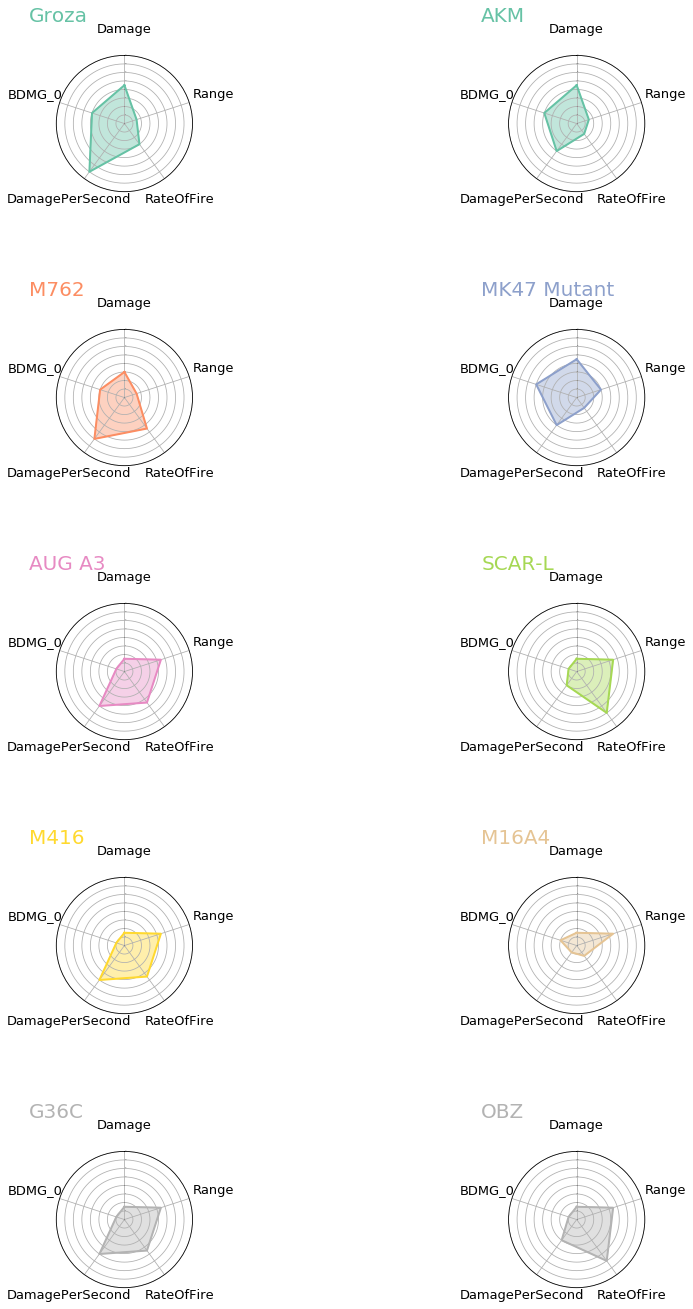

In [155]:
rifle_data = rifle_new.copy()
# 7탄만 그래프?
labels = rifle_data.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점, 각도 값을 담고 있는 리스트를 넣어줌
angles += angles[:1] ## 다시 시작점을 돌아오게 하는 기능

my_palette = plt.cm.get_cmap("Set2", len(rifle_data.index))

fig = plt.figure(figsize = (15, 20))
fig.set_facecolor('white')

for i, row in rifle_data.iterrows():
    color = my_palette(i)
    data = rifle_data.iloc[i].drop('WeaponName').tolist()
    data += data[:1]
    
    ax = plt.subplot(5,2,i+1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels, fontsize = 13)
    ax.tick_params(axis = 'x', which = 'major', pad = 15)
    
    ax.set_rlabel_position(0)
    plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize = 0)
    plt.ylim(0,16)
    
    ax.plot(angles, data, color = color, linewidth = 2, linestyle = 'solid')
    ax.fill(angles, data, color = color, alpha = 0.4)
    
    plt.title(row.WeaponName, size = 20, color=color, x=-0.2, y=1.2, ha='left')
plt.tight_layout(pad=7)
plt.show()